In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [1]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Calculate the date 1 year ago from the last data point in the database

# Perform a query to retrieve the data and precipitation scores

# Save the query results as a Pandas DataFrame and set the index to the date column

# Sort the dataframe by date

# Use Pandas Plotting with Matplotlib to plot the data


In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
max_date = session.query(
    func.max(Measurement.date)
).first()
max_date = [r for r in max_date]
last_date = dt.datetime.strptime(max_date[0], '%Y-%m-%d')


In [11]:
# Calculate the date 1 year ago from the last data point in the database
prev_year = last_date - dt.timedelta(days=365)

In [12]:
# Perform a query to retrieve the data and precipitation scores
query = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= prev_year).all()
query_list = [r for r in query]


In [13]:
# Save the query results as a Pandas DataFrame and set the index to the date column
climate_df = pd.DataFrame(query_list,columns=['date', 'precipitation'])
climate_df['date'] =pd.to_datetime(climate_df.date)
climate_df.set_index('date', inplace=True)


In [14]:
# Sort the dataframe by date
climate_df = climate_df.sort_values(by='date',ascending=False)

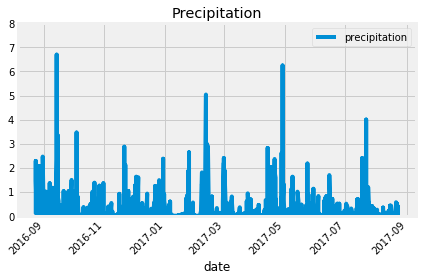

In [15]:
# Use Pandas Plotting with Matplotlib to plot the data
climate_df = climate_df.dropna()
climate_df.plot()
plt.xticks(rotation=45)
plt.ylim(0,8)
plt.title("Precipitation")
plt.legend(loc='upper right')
plt.tight_layout()

In [16]:
# Use Pandas to calcualte the summary statistics for the precipitation data
climate_df.describe()

,precipitation
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [17]:
# Design a query to show how many stations are available in this dataset?
station_count = session.query(func.count(Station.station)).all()
print(station_count)

[(9,)]


In [20]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
Q = [r for r in session.query(
    Measurement.station,
        func.count(Measurement.station)
        ).group_by(Measurement.station
            ).order_by(func.count(Measurement.station).desc()).all()]
Q

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [32]:
# Most active station

most_active_station = q[0][0]
most_active_station

'USC00519281'

In [33]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
[r for r in session.query(
                func.min(Measurement.tobs),
                func.max(Measurement.tobs),
                func.avg(Measurement.tobs)).filter(
                Measurement.station == most_active_station)]

[(54.0, 85.0, 71.66378066378067)]

USC00519281


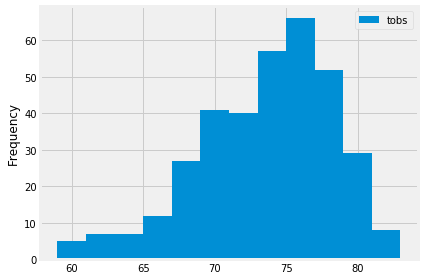

In [34]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
q = [r for r in session.query(
    Measurement.station,
        func.count(Measurement.tobs)
        ).group_by(Measurement.station
            ).order_by(func.count(Measurement.tobs).desc()).first()]
highest_tobs = q[0]
print(highest_tobs)

tobs_q = session.query(Measurement.tobs
                      ).filter(Measurement.date >= prev_year).filter(Measurement.station == highest_tobs).all()
tobs_df = pd.DataFrame(tobs_q)
tobs_df.head()
tobs_df.plot.hist(bins=12)

plt.legend(loc='best')
plt.tight_layout()

In [36]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [49]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
start_date = dt.date(2017,12,6)
end_date = dt.date(2017,12,20)
prev_year_start_date = start_date - dt.timedelta(days=365)
prev_year_end_date = end_date - dt.timedelta(days=365)
tmin, tavg, tmax = calc_temps(prev_year_start_date, prev_year_end_date)[0]
print(tmin, tavg, tmax)

60.0 70.35051546391753 78.0


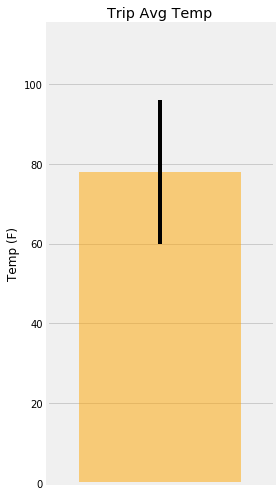

In [50]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


# fig, ax = plt.subplots(figsize=plt.figaspect(2.))
xpos = 1
yerr = tmax-tmin

plt.figure(figsize=(4,7))
plt.bar(xpos, tmax, yerr=yerr, alpha=0.5, width=0.1, color='orange', align="center")
plt.xticks(np.arange(1, 1.0))
plt.title("Trip Avg Temp")
plt.ylabel("Temp (F)")
plt.margins(0.2,0.2)
plt.tight_layout()

In [51]:
# Calculate the rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation

q = [r for r in session.query(
    Measurement.station,Station.name, 
    Station.latitude,
    Station.longitude, 
    Station.elevation,
        func.sum(Measurement.prcp)
        ).filter(Measurement.date >= prev_year_start_date
                ).filter(Measurement.date <= prev_year_end_date
                        ).group_by(Measurement.station
                                  ).order_by(func.sum(Measurement.prcp).desc()).all()]
q

[('USC00519281',
  'MANOA LYON ARBO 785.2, HI US',
  21.3331,
  -157.8025,
  152.4,
  17.19000000000001),
 ('USC00513117',
  'MANOA LYON ARBO 785.2, HI US',
  21.3331,
  -157.8025,
  152.4,
  12.779999999999978),
 ('USC00516128',
  'MANOA LYON ARBO 785.2, HI US',
  21.3331,
  -157.8025,
  152.4,
  11.249999999999993),
 ('USC00519397',
  'MANOA LYON ARBO 785.2, HI US',
  21.3331,
  -157.8025,
  152.4,
  8.099999999999993),
 ('USC00514830',
  'MANOA LYON ARBO 785.2, HI US',
  21.3331,
  -157.8025,
  152.4,
  7.650000000000002),
 ('USC00519523',
  'MANOA LYON ARBO 785.2, HI US',
  21.3331,
  -157.8025,
  152.4,
  7.19999999999999),
 ('USC00517948',
  'MANOA LYON ARBO 785.2, HI US',
  21.3331,
  -157.8025,
  152.4,
  2.6100000000000003)]

## Optional Challenge Assignment

In [52]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [53]:
trip_dates = pd.date_range(start_date, end_date, freq='D')
print(trip_dates)
month_day = trip_dates.strftime("%m-%d")
print(month_day)
normals = []
for date in month_day:
    normals.append(*daily_normals(date))
    
normals

DatetimeIndex(['2017-12-06', '2017-12-07', '2017-12-08', '2017-12-09',
               '2017-12-10', '2017-12-11', '2017-12-12', '2017-12-13',
               '2017-12-14', '2017-12-15', '2017-12-16', '2017-12-17',
               '2017-12-18', '2017-12-19', '2017-12-20'],
              dtype='datetime64[ns]', freq='D')
Index(['12-06', '12-07', '12-08', '12-09', '12-10', '12-11', '12-12', '12-13',
       '12-14', '12-15', '12-16', '12-17', '12-18', '12-19', '12-20'],
      dtype='object')


[(61.0, 69.3921568627451, 78.0),
 (58.0, 69.2, 79.0),
 (60.0, 70.27450980392157, 83.0),
 (64.0, 71.90196078431373, 80.0),
 (61.0, 71.24528301886792, 78.0),
 (64.0, 72.38775510204081, 78.0),
 (64.0, 70.88235294117646, 79.0),
 (65.0, 70.9423076923077, 80.0),
 (65.0, 71.18, 78.0),
 (62.0, 71.34, 79.0),
 (60.0, 69.62264150943396, 82.0),
 (63.0, 70.64, 77.0),
 (63.0, 71.28, 77.0),
 (67.0, 72.0, 78.0),
 (65.0, 72.91304347826087, 81.0)]

In [55]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date

daily_normals_df = pd.DataFrame()
daily_normals_df = pd.DataFrame(normals, 
                                     index=trip_dates, columns=[ 'tmin', 'tavg', 'tmax'])
daily_normals_df.index.name = 'date'
daily_normals_df

,tmin,tavg,tmax
date,,,
2017-12-06,61.0,69.392157,78.0
2017-12-07,58.0,69.200000,79.0
2017-12-08,60.0,70.274510,83.0
2017-12-09,64.0,71.901961,80.0
2017-12-10,61.0,71.245283,78.0
2017-12-11,64.0,72.387755,78.0
2017-12-12,64.0,70.882353,79.0
2017-12-13,65.0,70.942308,80.0
2017-12-14,65.0,71.180000,78.0


In [56]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


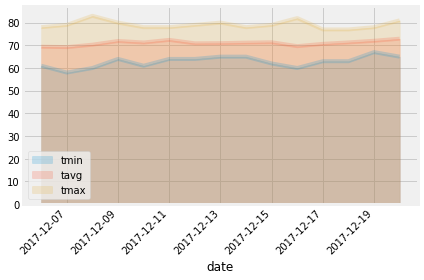

In [57]:
# Plot the daily normals as an area plot with `stacked=False`
daily_normals_df.plot(kind='area',x_compat=True, alpha=.2, stacked=False)
plt.xticks(rotation=45)
# ax.xaxis.set_major_formatter(mdates.DateFormatter('%m/%d/%Y'))
plt.tight_layout()